<a href="https://colab.research.google.com/github/MahmoudElkarargy/Face-Recognition/blob/main/Pattern_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip archive.zip

Archive:  archivee.zip
replace archive/archive/s1/1.pgm? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: archive/archive/s1/1.pgm  
  inflating: archive/archive/s1/10.pgm  
  inflating: archive/archive/s1/2.pgm  
  inflating: archive/archive/s1/3.pgm  
  inflating: archive/archive/s1/4.pgm  
  inflating: archive/archive/s1/5.pgm  
  inflating: archive/archive/s1/6.pgm  
  inflating: archive/archive/s1/7.pgm  
  inflating: archive/archive/s1/8.pgm  
  inflating: archive/archive/s1/9.pgm  
  inflating: archive/archive/s10/1.pgm  
  inflating: archive/archive/s10/10.pgm  
  inflating: archive/archive/s10/2.pgm  
  inflating: archive/archive/s10/3.pgm  
  inflating: archive/archive/s10/4.pgm  
  inflating: archive/archive/s10/5.pgm  
  inflating: archive/archive/s10/6.pgm  
  inflating: archive/archive/s10/7.pgm  
  inflating: archive/archive/s10/8.pgm  
  inflating: archive/archive/s10/9.pgm  
  inflating: archive/archive/s11/1.pgm  
  inflating: archive/archive/s11/10.pgm  
  inflat

In [ ]:
! unzip non_faces_scaled.zip

Archive:  non_faces_scaled.zip
   creating: non_faces_scaled/
  inflating: non_faces_scaled/335.pgm  
  inflating: non_faces_scaled/321.pgm  
  inflating: non_faces_scaled/309.pgm  
  inflating: non_faces_scaled/137.pgm  
  inflating: non_faces_scaled/123.pgm  
  inflating: non_faces_scaled/36.pgm  
  inflating: non_faces_scaled/22.pgm  
  inflating: non_faces_scaled/241.pgm  
  inflating: non_faces_scaled/255.pgm  
  inflating: non_faces_scaled/269.pgm  
  inflating: non_faces_scaled/282.pgm  
  inflating: non_faces_scaled/296.pgm  
  inflating: non_faces_scaled/297.pgm  
  inflating: non_faces_scaled/283.pgm  
  inflating: non_faces_scaled/268.pgm  
  inflating: non_faces_scaled/254.pgm  
  inflating: non_faces_scaled/240.pgm  
  inflating: non_faces_scaled/23.pgm  
  inflating: non_faces_scaled/37.pgm  
  inflating: non_faces_scaled/122.pgm  
  inflating: non_faces_scaled/136.pgm  
  inflating: non_faces_scaled/308.pgm  
  inflating: non_faces_scaled/320.pgm  
  inflating: non_faces

In [ ]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt 
import scipy


In [ ]:
# # 1. Download the Dataset and Understand the Format(10 Points)

headPath = "archive/archive/"

# Image specifications.
width = 92
height = 112
# Data specifications.
personsNum = 40
imgPerPerson = 10

imgData = np.zeros( (personsNum * imgPerPerson, width * height), dtype = int)
labels = np.zeros( (personsNum * imgPerPerson ,1), dtype = int) 
i = 0
# To handle reading in order.
folderNum = 1
imageNum = 1
# Looping through every person
for person in os.listdir(headPath):
  path = 's' + str(folderNum)
  personPath = os.path.join(headPath, path)
  
  # For each person loop on the 10 imgs.
  for img in os.listdir(personPath):
    imgNumPath = str(imageNum) + '.pgm'
    imgPath = os.path.join(personPath, imgNumPath)
    # Using 0 to read image in grayscale mode
    personImg = cv2.imread(imgPath, 0)
    # Convert img into 1D vector.
    imgData[i,:] = personImg.flatten()
    # save label, ignoring the 's'.
    labels[i] =  int(person[1:])
    i += 1
    imageNum += 1
  folderNum += 1
  imageNum = 1 

# !TEST :: Random data in imgData 1D matrix
print(imgData[280])


In [ ]:
def splitData(ratio, numOfImgs, personsNum):
  # Getting num of train data split from ratio.
  trainRatioNum = ratio * numOfImgs // 100
  testRatioNum = numOfImgs - trainRatioNum
  # Split the dataMatrix into training data and testing data.
  trainData = np.zeros( ( (personsNum * trainRatioNum) , width * height), dtype = int )
  trainLabels = np.zeros(( (personsNum * trainRatioNum) , 1), dtype = int )

  testData = np.zeros( ( (personsNum * testRatioNum) , width * height), dtype = int )
  testLabels = np.zeros(( (personsNum * testRatioNum) , 1), dtype = int )

  # !TEST :: Size of trainData and testData labels
  testDataNum = 0
  trainDataNum = 0

  if ratio == 50:
    # Keeping the odd rows for training and the even rows for testing.
    for idx in range(imgData.shape[0]):
      if idx % 2 == 0:
        testData[testDataNum, :] = imgData[idx]
        testLabels[testDataNum] = labels[idx]
        testDataNum += 1
      else:
        trainData[trainDataNum, :] = imgData[idx]
        trainLabels[trainDataNum] = labels[idx]
        trainDataNum += 1
  else:
    # Depending on ratio, loop..
    currentNum = 0
    while trainDataNum + testDataNum < trainData.shape[0] + testData.shape[0]:
      for idx in range(trainRatioNum):
        trainData[trainDataNum, :] = imgData[currentNum]
        trainLabels[trainDataNum] = labels[currentNum]
        trainDataNum += 1
        currentNum += 1
      for idx in range(testRatioNum):
        testData[testDataNum, :] = imgData[currentNum]
        testLabels[testDataNum] = labels[currentNum]
        testDataNum += 1
        currentNum += 1
  # !TEST :: number of trainData, testData and random data
  print("\n\n** number of trainData, testData and labels **")
  print(trainData.shape)
  print(testData.shape)
  print(trainLabels.shape)
  print(testLabels.shape)

  return trainData,  trainLabels, testData, testLabels

In [ ]:
# 3. Split the Dataset into Training and Test sets.
print("** 50% **")
ratio = 50
trainData,  trainLabels, testData, testLabels = splitData(ratio, imgPerPerson, personsNum)
print("\n\n\n ** 70% **")
ratio = 70
trainDataBonus,  trainLabelsBonus, testDataBonus, testLabelsBonus = splitData(ratio, imgPerPerson, personsNum)

** 50% **


** number of trainData, testData and labels **
(200, 10304)
(200, 10304)
(200, 1)
(200, 1)



 ** 70% **


** number of trainData, testData and labels **
(280, 10304)
(120, 10304)
(280, 1)
(120, 1)


In [ ]:
def ClassifierTuning(reducedDimensionData, trainLabel, reducedDimensionTest, testLabel):
  scoreKNN = []
  #knn PCA
  for idx in range(1, 8, 2):
    classifier = KNeighborsClassifier(n_neighbors = idx)
    classifier.fit(reducedDimensionData, trainLabel)
    pred = classifier.predict(reducedDimensionTest)

    scoreKNN.append( metrics.accuracy_score(testLabel, pred) * 100 )
  
  neirghbours=[1, 3, 5, 7]

  plt.plot(neirghbours, scoreKNN)                                         
  plt.xlabel("Number of neigbours")
  plt.ylabel("Score %")
  plt.show()

In [ ]:
# 2. Generate the Data Matrix and the Label vector for non faces

# Image specifications.
width = 92
height = 112
# Data specifications.
facesNum = 400
nonFacesNum = 400

facesData = np.zeros( (facesNum + nonFacesNum, width * height), dtype = int)
facesLabels = np.zeros( (facesNum + nonFacesNum ,1), dtype = int) 
i = 0



headPath = "archive/archive/"
# Data specifications.


# Looping through every person
for person in os.listdir(headPath):
  personPath = os.path.join(headPath, person)
  
  # For each person loop on the 10 imgs.
  for img in os.listdir(personPath):
    imgPath = os.path.join(personPath, img)
    # Using 0 to read image in grayscale mode
    personImg = cv2.imread(imgPath, 0)
    # Convert img into 1D vector.
    facesData[i,:] = personImg.flatten()
    # save label, ignoring the 's'.
    facesLabels[i] =  1
    i += 1


i = 400
headPath = "xxx/"
# Looping through every image
for img in os.listdir(headPath):
  imgPath = os.path.join(headPath, img)
  # Using 0 to read image in grayscale
  realImg = cv2.imread(imgPath, 0)
  #resized_image = cv2.resize(realImg, (width, height), interpolation = cv2.INTER_NEAREST)
  # Convert img into 1D vector.
  facesData[i,:] = realImg.flatten()
  # save label, ignoring the 's'.
  facesLabels[i] =  0
  i += 1



# !TEST :: Random data in imgData 1D matrix and size
print(facesData[799])
print(facesData.shape[0])
#print(facesData)
#print(facesLabels)

In [ ]:
# 3. Split the Dataset into Training and Test sets.

# Split the dataMatrix into training data and testing data.

trainDataFaces = np.zeros( ( (facesNum + nonFacesNum) // 2, width * height), dtype = int )
trainLabelsFaces = np.zeros(( (facesNum + nonFacesNum) // 2, 1), dtype = int )

testDataFaces = np.zeros( ( (facesNum + nonFacesNum) // 2, width * height), dtype = int )
testLabelsFaces = np.zeros(( (facesNum + nonFacesNum) // 2, 1), dtype = int )

# !TEST :: Size of trainData and testData labels
print(trainDataFaces.shape)
print(testLabelsFaces.shape)

testDataNum = 0
trainDataNum = 0

trainDataFaces  = np.zeros((400,10304))
trainLabelsFaces  = np.zeros((400,1))
testDataFaces = np.zeros((400,10304))
testLabelsFaces =  np.zeros((400,1))

for i in range(200):
    trainDataFaces[trainDataNum, :] = facesData[i]
    trainLabelsFaces[trainDataNum] = facesLabels[i]
    trainDataNum += 1
trainDataNum-=1    
print(trainDataNum)    
for i in range(399,600,1):  
    trainDataFaces[trainDataNum, :] = facesData[i]
    trainLabelsFaces[trainDataNum] = facesLabels[i]
    trainDataNum += 1
print(trainDataNum)    

for i in range(200,400,1):    
    testDataFaces[testDataNum, :] = facesData[i]
    testLabelsFaces[testDataNum] = facesLabels[i]
    testDataNum += 1
testDataNum-=1    
for i in range(600,800,1):    
    testDataFaces[testDataNum, :] = facesData[i]
    testLabelsFaces[testDataNum] = facesLabels[i]
    testDataNum += 1


# !TEST :: number of trainData, testData and random data
print(trainDataNum)
print(testDataNum)
#print(testLabelsFaces)
print(trainDataFaces.shape)
print(testDataFaces[100])

#print(trainLabelsFaces)

In [ ]:
# 4. Classification using PCA
def ClassificationPCA(trainData, trainLabel, testData, testLabels, alpha):
  # 4.1 Compute mean.
  trainMean = np.mean(trainData , axis = 0)
  testMean = np.mean(testData) 

  # 4.2 Center the data.
  centeredTrainData = trainData - trainMean
  centeredTestData = testData - testMean

  # !TEST :: train and test Mean
  print("** Train Mean **")
  print(trainMean)
  print("\n\n** Test Mean **")
  print(testMean)
  print("\n\n** centered Train Data **")
  print(centeredTrainData)
  print("\n\n** centered Train Data Size **")
  print(centeredTrainData.shape)

  # 4.3 compute the Covariance Matrix
  trainCovarianceMatrix = (np.transpose(centeredTrainData).dot(centeredTrainData))/len(trainData) 
  print("\n\n** Train Covariance Matrix **")
  print(trainCovarianceMatrix)

  # 4.4 - 4.5 compute eigenvalues and eigenVectors
  trainEigenValues , trainEigenVectors = np.linalg.eigh(trainCovarianceMatrix)
  print("\n\n** train Eigen Values and vectors Size **")
  print(trainEigenValues.shape)
  print(trainEigenVectors.shape)

  trainEigenValuesFilpped = np.flip(trainEigenValues)

  EiganValuesSum = np.sum(trainEigenValuesFilpped,axis=0)
  print("\n\n** EiganValuesSum **")
  print(EiganValuesSum)

  # 4.6 - 4.7 fractional of total variance and dimentionality.
  r = [0, 0, 0, 0]

  for idx in range(len(alpha)):
    # Reset variables
    i = 0
    summation = 0.0
    # Get r value depending on Alpha
    while summation / EiganValuesSum < alpha[idx]:                                                           
      summation = summation + trainEigenValuesFilpped[r[idx]]   
      r[idx] = r[idx] + 1
  print("\n\n** R **")
  print(r)

  # Flip the train vectors
  trainEigenVECTORsFilpped = np.flip(trainEigenVectors, axis=1)
  # save the reduced data
  reducedEigenVectors = []
  for num in r:
    reducedEigenVectors.append(trainEigenVECTORsFilpped[:,0:num])

  print("\n\n** reduced Eigen Vectors **")
  print(reducedEigenVectors[0].shape)

  # Transform the data
  reducedDimensionData = []
  reducedDimensionTest = []
  for vector in reducedEigenVectors:
    reducedDimensionData.append( np.dot(trainData, vector) )
    reducedDimensionTest.append( np.dot(testData, vector) )

  print("\n\n** reduced Dimension Data **")
  print(reducedDimensionData[0].shape)

  print("\n\n** reduced Dimension Test **")
  print(reducedDimensionTest[0].shape)

  # PLOTING THE GRAPH

  
  classifier = KNeighborsClassifier(n_neighbors = 1)
  scores = []
  for idx in range(len(alpha)):
    classifier.fit(reducedDimensionData[idx], trainLabel)
    prediction = classifier.predict( reducedDimensionTest[idx] )
    if idx==0:
      x=prediction
    scores.append( metrics.accuracy_score(testLabels, prediction)*100 )
  
  print("\n\n** Scores **")
  print(scores)
  print("\n")
  
  plt.plot(alpha,scores)                                         
  plt.xlabel("Alpha")
  plt.ylabel("Score %")
  plt.show()
  print("\nconfusion matrix\n",confusion_matrix(testLabels,x))
  ClassifierTuning(reducedDimensionData[0],trainLabel,reducedDimensionTest[0],testLabels)
  return reducedDimensionData, reducedDimensionTest


** Train Mean **
[110.1325 110.22   110.     ... 112.08   111.555  110.4475]


** Test Mean **
125.3726984666149


** centered Train Data **
[[   0.8675   -0.22      4.     ...  -55.08    -58.555   -62.4475]
 [   2.8675    0.78      2.     ...  -65.08    -54.555   -55.4475]
 [  -1.1325    0.78      1.     ...  -61.08    -61.555   -59.4475]
 ...
 [ 125.8675  125.78    126.     ...  111.92    110.445   113.5525]
 [-110.1325 -110.22   -110.     ...  -52.08    -56.555   -85.4475]
 [ -22.1325  -20.22    -21.     ...  -27.08    -26.555   -25.4475]]


** centered Train Data Size **
(400, 10304)


** Train Covariance Matrix **
[[4464.02994375 4394.73335    4348.26       ... 1929.4544
  2019.9989625  2074.85570625]
 [4394.73335    4421.5616     4377.9        ... 1936.1824
  2031.7129     2080.85155   ]
 [4348.26       4377.9        4390.68       ... 1948.05
  2041.3075     2092.475     ]
 ...
 [1929.4544     1936.1824     1948.05       ... 4759.8736
  4605.3581     4471.0867    ]
 [2019.9989625

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


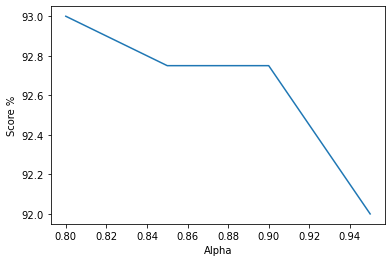


confusion matrix
 [[179  22]
 [  6 193]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


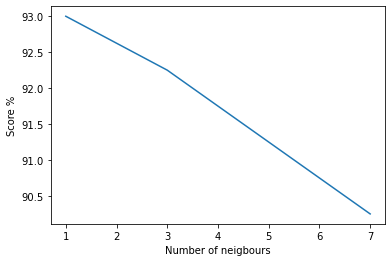

([array([[-6.20133717e+03, -7.70202121e+03,  4.08476791e+02, ...,
          -3.64068018e+02,  6.67934842e+01, -5.17654323e+02],
         [-6.32329813e+03, -7.49106660e+03,  6.72978953e+02, ...,
          -8.03356758e+00,  4.94432523e+01, -5.12301932e+02],
         [-6.25220597e+03, -7.36875445e+03,  4.19396651e+02, ...,
          -1.07681017e+02, -1.03462827e+02, -6.31310117e+02],
         ...,
         [-1.85726767e+04, -8.62881353e+03, -1.11256011e+02, ...,
          -1.56857280e+02,  3.40040176e+02, -1.36903599e+02],
         [-6.77805535e+03, -1.21981189e+04,  2.81040867e+03, ...,
          -4.16927357e+02,  8.92877184e+02, -4.79429975e+02],
         [-7.27350860e+03, -5.13272820e+03,  4.13497154e+02, ...,
           2.53917864e+02,  3.72020146e+02, -3.82393169e+02]]),
  array([[ -6201.33716622,  -7702.02121027,    408.47679072, ...,
             -92.8965691 ,    -67.59579338,   -204.69354491],
         [ -6323.29813124,  -7491.0665985 ,    672.97895328, ...,
            -427.67989

In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]
# Classfication for non faces.
ClassificationPCA(trainDataFaces, trainLabelsFaces, testDataFaces, testLabelsFaces, alpha)

** Train Mean **
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]


** Test Mean **
112.74473505434783


** centered Train Data **
[[-25.12  -24.89  -23.165 ... -45.24  -40.335 -39.37 ]
 [-22.12  -31.89  -50.165 ... -36.24  -64.335 -49.37 ]
 [-42.12  -34.89  -44.165 ...  80.76   78.665  95.63 ]
 ...
 [ 37.88   36.11   40.835 ... -37.24  -39.335 -31.37 ]
 [ 39.88   34.11   38.835 ... -41.24  -35.335 -33.37 ]
 [ 39.88   39.11   38.835 ... -41.24  -39.335 -39.37 ]]


** centered Train Data Size **
(200, 10304)


** Train Covariance Matrix **
[[1318.8756   1299.2282   1304.6652   ... -235.7588   -126.0752
   -75.5394  ]
 [1299.2282   1295.5879   1293.30315  ... -218.1036   -112.70315
   -64.3043  ]
 [1304.6652   1293.30315  1306.107775 ... -216.9946    -99.325275
   -49.28605 ]
 ...
 [-235.7588   -218.1036   -216.9946   ... 2505.0524   1995.4546
  1882.7162  ]
 [-126.0752   -112.70315   -99.325275 ... 1995.4546   1972.392775
  1859.56105 ]
 [ -75.5394    -64.3043    -49.28605  ... 1882.7162

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


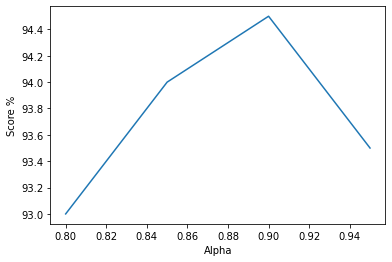


confusion matrix
 [[5 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 4]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


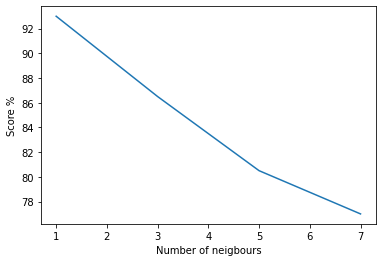

([array([[-11106.47108029,  -7091.09481841,    -59.64749871, ...,
            -815.12553337,    866.9558306 ,   -115.57716621],
         [-11330.98142004,  -7570.54912629,    571.83253487, ...,
            -754.50333752,   -237.38002924,   -222.60747607],
         [-10633.14921907,  -7470.25930702,    598.05173726, ...,
            -881.67323246,   -459.67046311,   -481.7753441 ],
         ...,
         [ -8837.54990078,  -7536.35784772,   -851.72100537, ...,
            -575.08792274,     50.17575818,   -323.9909341 ],
         [ -9018.69960477,  -7466.47259445,   -766.44567925, ...,
            -484.12763185,    258.83681678,   -385.42796919],
         [ -8701.95604874,  -6940.40805141,  -1437.01011659, ...,
            -591.9242392 ,     36.02379166,   -368.25222295]]),
  array([[-1.11064711e+04, -7.09109482e+03, -5.96474987e+01, ...,
          -1.29489830e+02,  5.36043972e+02, -9.51194693e+01],
         [-1.13309814e+04, -7.57054913e+03,  5.71832535e+02, ...,
           1.41005599e

In [ ]:
# Classfiction PCA for faces, ratio 50%
ClassificationPCA(trainData,  trainLabels, testData, testLabels,alpha)

** Train Mean **
[85.41071429 85.33928571 85.65357143 ... 74.75714286 74.16785714
 73.35714286]


** Test Mean **
112.84665178571429


** centered Train Data **
[[-37.41071429 -36.33928571 -40.65357143 ... -27.75714286 -28.16785714
  -27.35714286]
 [-25.41071429 -25.33928571 -23.65357143 ... -42.75714286 -40.16785714
  -39.35714286]
 [-46.41071429 -41.33928571 -32.65357143 ... -45.75714286 -48.16785714
  -44.35714286]
 ...
 [ 42.58928571  39.66071429  39.34642857 ...  10.24285714  15.83214286
   10.64285714]
 [ 37.58928571  35.66071429  40.34642857 ... -34.75714286 -39.16785714
  -31.35714286]
 [ 43.58928571  41.66071429  47.34642857 ...  18.24285714  18.83214286
   19.64285714]]


** centered Train Data Size **
(280, 10304)


** Train Covariance Matrix **
[[1267.49917092 1256.57493622 1253.02442602 ... -140.0002551
  -106.5653699   -31.9002551 ]
 [1256.57493622 1263.58131378 1254.41753827 ... -128.58903061
   -97.08909439  -26.49260204]
 [1253.02442602 1254.41753827 1261.3621301  ... 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


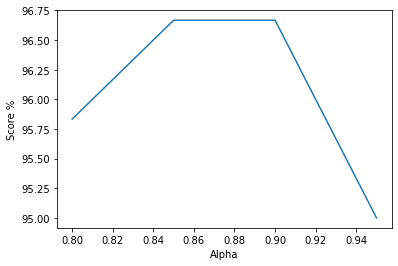


confusion matrix
 [[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


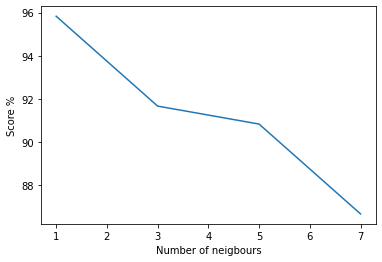

In [ ]:
# Classfiction PCA for faces, ratio 70%
reducedDimensionDataBonus, reducedDimensionTestBonus = ClassificationPCA(trainDataBonus, trainLabelsBonus, testDataBonus, testLabelsBonus, alpha)

In [ ]:
# 5. Classification Using LDA
def ClassificationLDA(trainData,trainLabels,testData,testLabels):
  mean_vectors= np.zeros((40,10304), dtype = int)
  x=0
  #get mean for every 5 instances which represent a class
  for i in range(0,40):
  
    mean_vectors[i,:]=np.mean(trainData[x:x+5,:],axis=0)
    x=x+5
     #(i)Calculate the mean vector for every class Mu1, Mu2, ..., Mu40.
    print('M%s: %s\n' %(i+1, mean_vectors[i]))
  
  print(mean_vectors.shape)
  print("Mean vector:\n")
  print(mean_vectors)

  #calculate overallmean
  overall_mean2=np.mean(trainData, axis=0)
  print("overall Mean:\n")

  print(overall_mean2)

#================================================================================
  
  S_B = np.zeros((10304,10304))

  for k,mean_vec in enumerate(mean_vectors):  
      n = 5
      mean_vec = mean_vec.reshape(10304,1) 
      overall_mean2 = overall_mean2.reshape(10304,1)
      S_B +=np.dot( n * (mean_vec - overall_mean2),((mean_vec- overall_mean2).T))

#================================================================================
  S_W = np.zeros((10304,10304))
  x = 0;
  for i in range(40):
    mv = mean_vectors[i,:]
    c = trainData [x:x+5,:]
    x+=5 
    Temp = np.dot((c-mv).T,(c-mv))
    S_W += Temp
  print(S_W)  
#================================================================================ 
  eValues,eVectors = np.linalg.eigh(np.dot(np.linalg.pinv(S_W),S_B))
  eVectors=np.flip(eVectors,axis=1) 

#================================================================================
#(iv)Use 39 dominant eigenvectors instead and get the projection matrix U39x10304 (ReducedvectorLDA)
  print(eVectors)
  ReducedvectorLDA=eVectors[:,0:39]
  #(b)Projecting the training set, and test sets separately using the same projection matrix U
  reduceddata=np.dot(trainData,ReducedvectorLDA)
  reducedtest=np.dot(testData,ReducedvectorLDA)


  #(c)classifier
  
  classifier = KNeighborsClassifier(n_neighbors=1)


  classifier.fit(reduceddata, trainLabels)
  pred = classifier.predict(reducedtest)
  #(d)calculating LDA acuuracy
  
  score1  = metrics.accuracy_score(testLabels,pred)*100

  ClassifierTuning(reduceddata,trainLabels,reducedtest,testLabels)
  print(score1)


  

M1: [48 48 40 ... 62 56 59]

M2: [35 35 35 ... 71 71 71]

M3: [105 104 107 ...  50  48  50]

M4: [118 118 118 ...  70  69  69]

M5: [128 129 127 ...  72  71  72]

M6: [153 152 152 ... 103 103 103]

M7: [56 57 57 ... 64 65 65]

M8: [122 118 119 ...  59  56  59]

M9: [109 111 110 ...  84  82  83]

M10: [134 130 132 ...  26  30  32]

M11: [46 47 46 ... 34 34 37]

M12: [104 106 105 ...  38  40  33]

M13: [107 109 108 ...  20  25  23]

M14: [ 45  47  46 ... 142 142 123]

M15: [72 72 71 ... 71 49 54]

M16: [60 59 61 ... 64 64 60]

M17: [49 49 51 ... 42 46 46]

M18: [121 120 122 ...  73  74  73]

M19: [49 46 50 ... 37 40 35]

M20: [111 111 112 ...  35  38  36]

M21: [103 101 102 ... 155 146 154]

M22: [ 55  55  56 ... 175 124 128]

M23: [122 121 121 ...  77  82  83]

M24: [36 38 38 ... 87 51 48]

M25: [121 122 121 ...  93  99  92]

M26: [111 109 109 ...  58  59  61]

M27: [41 43 40 ... 26 21 25]

M28: [94 93 93 ... 74 73 66]

M29: [102 104 100 ...  65  66  65]

M30: [109 109 109 ...  83  83  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was p

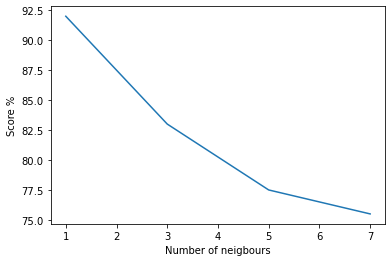

92.0


In [ ]:

ClassificationLDA(trainData,  trainLabels, testData, testLabels)

In [ ]:
# 5. Classification Using LDA
def ClassificationLDAnonFaces(trainData,trainLabels,testData,testLabels,numnoface):
  mean_vectors= np.zeros((2,10304), dtype = int)
  x=0
  #get mean for every 5 instances which represent a class

      #mean_vectors[0,:]=np.mean(trainData[0:200,:],axis=0)
     

     # mean_vectors[1,:]=np.mean(trainData[200:numnoface,:],axis=0)
 

     #(i)Calculate the mean vector for every class Mu1, Mu2, ..., Mu40.
    #print('M%s: %s\n' %(i+1, mean_vectors[i]))
  
  print(mean_vectors.shape)
  print("Mean vector:\n")
  print(mean_vectors)

  #calculate overallmean
  #overall_mean2=np.mean(trainData[0:200+numnoface], axis=0)
  print("overall Mean:\n")

  #print(overall_mean2)

#================================================================================
  mean1=np.mean(trainData[0:200,:],axis=0)
  mean2=np.mean(trainData[200:200+numnoface,:],axis=0)
  print(mean1.shape)
  S_B = np.zeros((10304,10304))
  print('xxxxxx')
  print(mean1.shape)
  print(mean2.shape)

  S_B=np.dot(  (mean1.reshape((1,-1)) - mean2.reshape((1,-1))).T , (mean1.reshape((1,-1))- mean2.reshape((1,-1))) )
  print('S_B')
  print(S_B)      

#================================================================================
  S_W = np.zeros((10304,10304))
  x = 0;
  for i in range(2):
    if i==0 :
      mv = mean_vectors[i,:]
      c = trainData [x:x+200,:]
      x+=200
      Temp = np.dot((c-mv).T,(c-mv))
      S_W += Temp
    if i==1:
      mv = mean_vectors[i,:]
      c = trainData [x:x+numnoface,:]
      x+=200
      Temp = np.dot((c-mv).T,(c-mv))
      S_W += Temp

  print('S_W')  
  print(S_W)  
#================================================================================ 
  eValues,eVectors = np.linalg.eigh(np.real(np.dot(scipy.linalg.pinvh(S_W),S_B)))
  eVectors=np.flip(eVectors,axis=1) 
  eVectors=np.real(eVectors)

#================================================================================
#(iv)Use 39 dominant eigenvectors instead and get the projection matrix U39x10304 (ReducedvectorLDA)
  print(eVectors)
  ReducedvectorLDA=eVectors[:,0:1]
  #(b)Projecting the training set, and test sets separately using the same projection matrix U
  reduceddata=np.dot(trainData[0:200+numnoface,:],ReducedvectorLDA)
  reducedtest=np.dot(testData[0:200+numnoface,:],ReducedvectorLDA)


  #(c)classifier
  
  classifier = KNeighborsClassifier(n_neighbors=1)


  classifier.fit(reduceddata, trainLabels[0:200+numnoface,:])
  pred = classifier.predict(reducedtest)
  #(d)calculating LDA acuuracy
  
  score1  = metrics.accuracy_score(testLabels[0:200+numnoface,:],pred)*100
  print("\nconfusion matrix\n",confusion_matrix(testLabels[0:200+numnoface,:],pred))

  #ClassifierTuning(reduceddata,trainLabels,reducedtest,testLabels)
  print(score1)




  return score1


  

In [ ]:
noface400=ClassificationLDAnonFaces(trainDataFaces, trainLabelsFaces, testDataFaces, testLabelsFaces,400)

(2, 10304)
Mean vector:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
overall Mean:

(10304,)
xxxxxx
(10304,)
(10304,)
S_B
[[2082.553225 2090.53935  2052.20595  ... 3113.2197   3195.3627
  3155.888425]
 [2090.53935  2098.5561   2060.0757   ... 3125.1582   3207.6162
  3167.99055 ]
 [2052.20595  2060.0757   2022.3009   ... 3067.8534   3148.7994
  3109.90035 ]
 ...
 [3113.2197   3125.1582   3067.8534   ... 4653.9684   4776.7644
  4717.7541  ]
 [3195.3627   3207.6162   3148.7994   ... 4776.7644   4902.8004
  4842.2331  ]
 [3155.888425 3167.99055  3109.90035  ... 4717.7541   4842.2331
  4782.414025]]
S_W
[[6637279. 6613415. 6585134. ... 5709242. 5722332. 5695486.]
 [6613415. 6628004. 6600840. ... 5715856. 5730922. 5701750.]
 [6585134. 6600840. 6596272. ... 5710740. 5724943. 5696680.]
 ...
 [5709242. 5715856. 5710740. ... 6928720. 6843377. 6740017.]
 [5722332. 5730922. 5724943. ... 6843377. 6861968. 6764106.]
 [5695486. 5701750. 5696680. ... 6740017. 6764106. 6738153.]]
[[ 0.00991949 -0.00633885  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
noface200=ClassificationLDAnonFaces(trainDataFaces, trainLabelsFaces, testDataFaces, testLabelsFaces,200)

(2, 10304)
Mean vector:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
overall Mean:

(10304,)
xxxxxx
(10304,)
(10304,)
S_B
[[2082.553225 2090.53935  2052.20595  ... 3113.2197   3195.3627
  3155.888425]
 [2090.53935  2098.5561   2060.0757   ... 3125.1582   3207.6162
  3167.99055 ]
 [2052.20595  2060.0757   2022.3009   ... 3067.8534   3148.7994
  3109.90035 ]
 ...
 [3113.2197   3125.1582   3067.8534   ... 4653.9684   4776.7644
  4717.7541  ]
 [3195.3627   3207.6162   3148.7994   ... 4776.7644   4902.8004
  4842.2331  ]
 [3155.888425 3167.99055  3109.90035  ... 4717.7541   4842.2331
  4782.414025]]
S_W
[[6637279. 6613415. 6585134. ... 5709242. 5722332. 5695486.]
 [6613415. 6628004. 6600840. ... 5715856. 5730922. 5701750.]
 [6585134. 6600840. 6596272. ... 5710740. 5724943. 5696680.]
 ...
 [5709242. 5715856. 5710740. ... 6928720. 6843377. 6740017.]
 [5722332. 5730922. 5724943. ... 6843377. 6861968. 6764106.]
 [5695486. 5701750. 5696680. ... 6740017. 6764106. 6738153.]]
[[ 0.00991949 -0.00633885  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
noface100=ClassificationLDAnonFaces(trainDataFaces, trainLabelsFaces, testDataFaces, testLabelsFaces,100)

(2, 10304)
Mean vector:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
overall Mean:

(10304,)
xxxxxx
(10304,)
(10304,)
S_B
[[2564.916025 2610.496525 2518.829075 ... 3066.55475  3169.110875
  3088.3321  ]
 [2610.496525 2656.887025 2563.590575 ... 3121.04975  3225.428375
  3143.2141  ]
 [2518.829075 2563.590575 2473.570225 ... 3011.45425  3112.167625
  3032.8403  ]
 ...
 [3066.55475  3121.04975  3011.45425  ... 3666.3025   3788.91625
  3692.339   ]
 [3169.110875 3225.428375 3112.167625 ... 3788.91625  3915.630625
  3815.8235  ]
 [3088.3321   3143.2141   3032.8403   ... 3692.339    3815.8235
  3718.5604  ]]
S_W
[[4332967. 4320599. 4298361. ... 3614974. 3616833. 3590400.]
 [4320599. 4333957. 4310214. ... 3629980. 3631545. 3601049.]
 [4298361. 4310214. 4298392. ... 3618178. 3618908. 3589101.]
 ...
 [3614974. 3629980. 3618178. ... 4137116. 4065445. 3983532.]
 [3616833. 3631545. 3618908. ... 4065445. 4077769. 3999617.]
 [3590400. 3601049. 3589101. ... 3983532. 3999617. 3977311.]]
[[-0.01063883 -0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


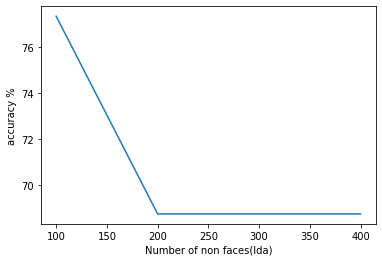

In [ ]:
  plt.plot([100,200,400],[noface100,noface200,noface400])                                         
  plt.xlabel("Number of non faces(lda)")
  plt.ylabel("accuracy %")
  plt.show()

** Train Mean **
[110.1325 110.22   110.     ... 112.08   111.555  110.4475]


** Test Mean **
125.3726984666149


** centered Train Data **
[[   0.8675   -0.22      4.     ...  -55.08    -58.555   -62.4475]
 [   2.8675    0.78      2.     ...  -65.08    -54.555   -55.4475]
 [  -1.1325    0.78      1.     ...  -61.08    -61.555   -59.4475]
 ...
 [ 125.8675  125.78    126.     ...  111.92    110.445   113.5525]
 [-110.1325 -110.22   -110.     ...  -52.08    -56.555   -85.4475]
 [ -22.1325  -20.22    -21.     ...  -27.08    -26.555   -25.4475]]


** centered Train Data Size **
(400, 10304)


** Train Covariance Matrix **
[[4464.02994375 4394.73335    4348.26       ... 1929.4544
  2019.9989625  2074.85570625]
 [4394.73335    4421.5616     4377.9        ... 1936.1824
  2031.7129     2080.85155   ]
 [4348.26       4377.9        4390.68       ... 1948.05
  2041.3075     2092.475     ]
 ...
 [1929.4544     1936.1824     1948.05       ... 4759.8736
  4605.3581     4471.0867    ]
 [2019.9989625

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


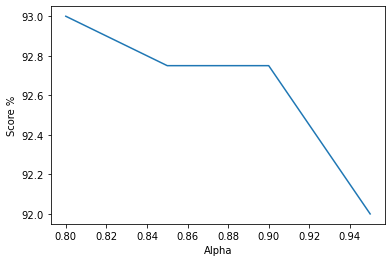


confusion matrix
 [[179  22]
 [  6 193]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


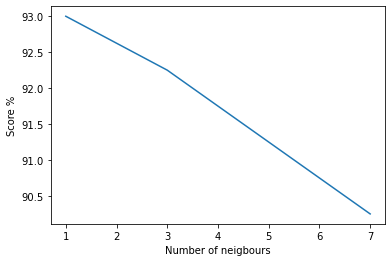

In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]
#pca 400-400
score1=ClassificationPCA(trainDataFaces, trainLabelsFaces, testDataFaces, testLabelsFaces, alpha)

** Train Mean **
[104.19666667 104.49666667 104.09333333 ...  98.15333333  97.40333333
  96.19666667]


** Test Mean **
122.71724605331264


** centered Train Data **
[[  6.80333333   5.50333333   9.90666667 ... -41.15333333 -44.40333333
  -48.19666667]
 [  8.80333333   6.50333333   7.90666667 ... -51.15333333 -40.40333333
  -41.19666667]
 [  4.80333333   6.50333333   6.90666667 ... -47.15333333 -47.40333333
  -45.19666667]
 ...
 [ 48.80333333  49.50333333  49.90666667 ...   6.84666667  12.59666667
   17.80333333]
 [-63.19666667 -62.49666667 -61.09333333 ...  77.84666667  74.59666667
   69.80333333]
 [-47.19666667 -39.49666667 -43.09333333 ... -47.15333333 -42.40333333
  -39.19666667]]


** centered Train Data Size **
(300, 10304)


** Train Covariance Matrix **
[[3586.27798889 3513.79232222 3481.69164444 ... 1822.66317778
  1907.00734444 1944.62798889]
 [3513.79232222 3526.96998889 3489.97364444 ... 1843.23717778
  1926.82634444 1951.26565556]
 [3481.69164444 3489.97364444 3492.551288

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


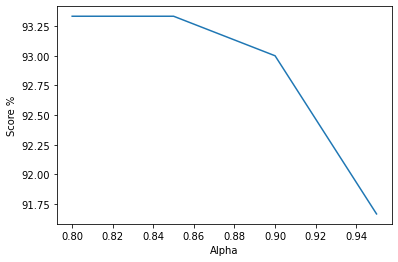


confusion matrix
 [[ 87  14]
 [  6 193]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


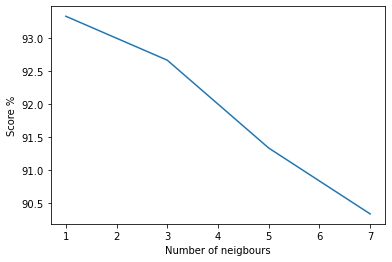

In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]
#pca 400-200
score2=ClassificationPCA(trainDataFaces[0:300,:], trainLabelsFaces[0:300,:], testDataFaces[0:300,:], testLabelsFaces[0:300,:], alpha)

** Train Mean **
[97.272 97.872 97.588 ... 90.316 88.952 87.852]


** Test Mean **
121.37643982919255


** centered Train Data **
[[ 13.728  12.128  16.412 ... -33.316 -35.952 -39.852]
 [ 15.728  13.128  14.412 ... -43.316 -31.952 -32.852]
 [ 11.728  13.128  13.412 ... -39.316 -38.952 -36.852]
 ...
 [-71.272 -70.872 -70.588 ... 103.684  83.048  67.148]
 [-10.272 -10.872 -10.588 ... -88.316 -86.952 -87.852]
 [117.728 119.128 120.412 ...  75.684  77.048  78.148]]


** centered Train Data Size **
(250, 10304)


** Train Covariance Matrix **
[[2753.982016 2689.918816 2661.776064 ... 1282.130048 1367.749056
  1433.276256]
 [2689.918816 2700.431616 2664.131264 ... 1300.176448 1386.069856
  1432.973056]
 [2661.776064 2664.131264 2660.010256 ... 1294.986192 1378.376224
  1424.339024]
 ...
 [1282.130048 1300.176448 1294.986192 ... 3419.992144 3211.707168
  3043.334768]
 [1367.749056 1386.069856 1378.376224 ... 3211.707168 3321.165696
  3166.760896]
 [1433.276256 1432.973056 1424.339024 ... 3043

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




** Scores **
[96.8, 95.6, 96.8, 95.6]




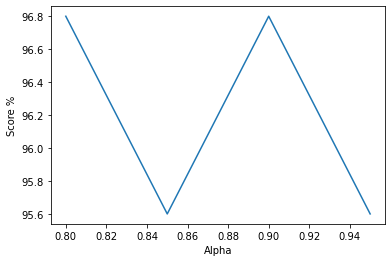


confusion matrix
 [[ 46   5]
 [  3 196]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


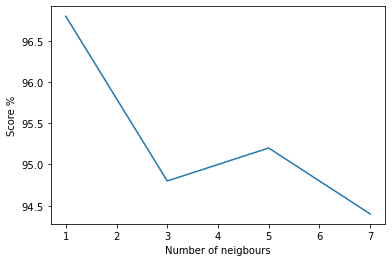

In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]
#pca 400-100
score3=ClassificationPCA(trainDataFaces[0:250,:], trainLabelsFaces[0:250,:], testDataFaces[0:250,:], testLabelsFaces[0:250,:], alpha)

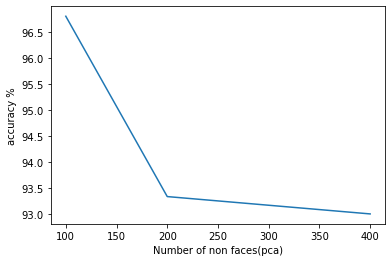

In [ ]:
  plt.plot([100,200,400],[96.8,93.3333,93])                                         
  plt.xlabel("Number of non faces(pca)")
  plt.ylabel("accuracy %")
  plt.show()